In [1]:
from sklearn.datasets import load_wine
data = load_wine()
data.target[[10, 80, 140]]

#list(data.target_names)

array([0, 1, 2])

In [1]:
import pandas as pd

In [2]:
income = pd.read_csv('adult.csv')

In [9]:
income.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K


In [12]:
income.describe()

,age,fnlwgt,education.num,capital.gain,capital.loss,hours.per.week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


### check cleaness of data

In [14]:
income.isna().any()

age               False
workclass         False
fnlwgt            False
education         False
education.num     False
marital.status    False
occupation        False
relationship      False
race              False
sex               False
capital.gain      False
capital.loss      False
hours.per.week    False
native.country    False
income            False
dtype: bool

### find out 'NA' s

In [18]:
for item in income.columns:
    if '?' in set(income[item]):
        print(item)

workclass
occupation
native.country


In [19]:
set(income.workclass)

{'?',
 'Federal-gov',
 'Local-gov',
 'Never-worked',
 'Private',
 'Self-emp-inc',
 'Self-emp-not-inc',
 'State-gov',
 'Without-pay'}

In [20]:
set(income.occupation)

{'?',
 'Adm-clerical',
 'Armed-Forces',
 'Craft-repair',
 'Exec-managerial',
 'Farming-fishing',
 'Handlers-cleaners',
 'Machine-op-inspct',
 'Other-service',
 'Priv-house-serv',
 'Prof-specialty',
 'Protective-serv',
 'Sales',
 'Tech-support',
 'Transport-moving'}

### checking on native country NAs

In [5]:
country_counts = income['native.country'].value_counts()
country_counts

United-States                 29170
Mexico                          643
?                               583
Philippines                     198
Germany                         137
Canada                          121
Puerto-Rico                     114
El-Salvador                     106
India                           100
Cuba                             95
England                          90
Jamaica                          81
South                            80
China                            75
Italy                            73
Dominican-Republic               70
Vietnam                          67
Guatemala                        64
Japan                            62
Poland                           60
Columbia                         59
Taiwan                           51
Haiti                            44
Iran                             43
Portugal                         37
Nicaragua                        34
Peru                             31
France                      

In [6]:
country_counts_df = country_counts.to_frame(name='counts')
small = list(country_counts_df[country_counts_df.counts<100].index)
small

['Cuba',
 'England',
 'Jamaica',
 'South',
 'China',
 'Italy',
 'Dominican-Republic',
 'Vietnam',
 'Guatemala',
 'Japan',
 'Poland',
 'Columbia',
 'Taiwan',
 'Haiti',
 'Iran',
 'Portugal',
 'Nicaragua',
 'Peru',
 'France',
 'Greece',
 'Ecuador',
 'Ireland',
 'Hong',
 'Cambodia',
 'Trinadad&Tobago',
 'Thailand',
 'Laos',
 'Yugoslavia',
 'Outlying-US(Guam-USVI-etc)',
 'Hungary',
 'Honduras',
 'Scotland',
 'Holand-Netherlands']

In [81]:
income[income['native.country']=='?'].income.value_counts()

<=50K    437
>50K     146
Name: income, dtype: int64

In [93]:
aa = small_pop.groupby(['native.country','income']).count().age#.hist()

In [105]:
aa = aa.to_frame()

In [122]:
aa = aa.reset_index()

In [134]:
aa

,native.country,income,age
0,Cambodia,<=50K,12
1,Cambodia,>50K,7
2,China,<=50K,55
3,China,>50K,20
4,Columbia,<=50K,57
...,...,...,...
59,Trinadad&Tobago,>50K,2
60,Vietnam,<=50K,62
61,Vietnam,>50K,5
62,Yugoslavia,<=50K,10


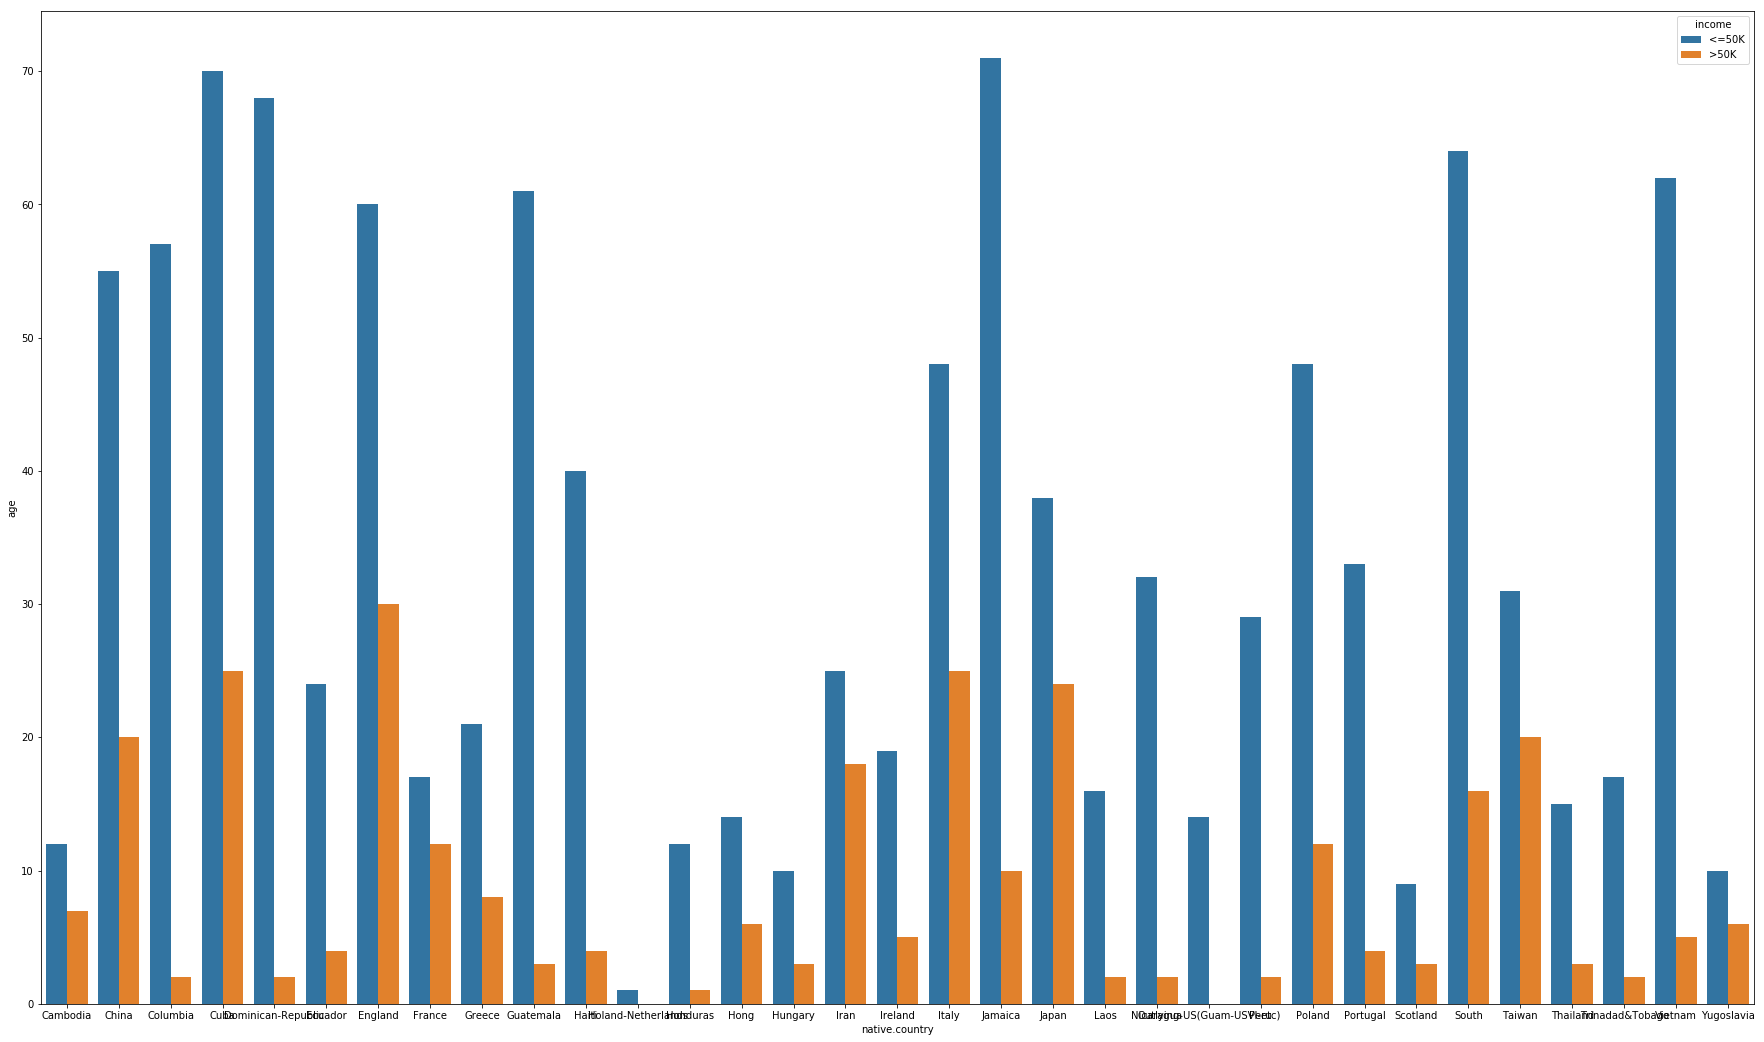

In [133]:
import seaborn as sns
import matplotlib.pyplot as plt
#sns.set_theme(style="ticks", color_codes=True)

a4_dims = (30.7, 18.27)
fig, ax = plt.subplots(figsize=a4_dims)
sns.barplot(x='native.country',y='age',data=aa,hue='income')


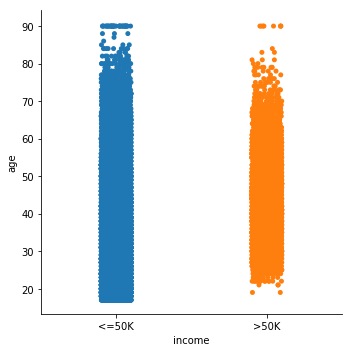

In [68]:
sns.catplot(x="income", y="age", data=income)

In [7]:
small_pop = income[income['native.country'].apply(lambda x:x in small)]

In [8]:
other  = income[income['native.country'].apply(lambda x:x == '?')]

In [136]:
other.income.value_counts()

<=50K    437
>50K     146
Name: income, dtype: int64

In [79]:
small_pop.income.value_counts()

<=50K    1103
>50K      286
Name: income, dtype: int64

In [9]:
income_modified = income.copy()

In [10]:
income_modified.loc[income_modified['native.country'].apply(lambda x:x in small+['?']),['native.country']] = 'other'

In [14]:
income_modified['native.country'].value_counts()

United-States    29170
other             1972
Mexico             643
Philippines        198
Germany            137
Canada             121
Puerto-Rico        114
El-Salvador        106
India              100
Name: native.country, dtype: int64

In [80]:
income.income.value_counts()

<=50K    24720
>50K      7841
Name: income, dtype: int64

### working on work class and ocupation

In [11]:
set(income_modified.workclass)

{'?',
 'Federal-gov',
 'Local-gov',
 'Never-worked',
 'Private',
 'Self-emp-inc',
 'Self-emp-not-inc',
 'State-gov',
 'Without-pay'}

In [165]:
set(income.occupation)

{'?',
 'Adm-clerical',
 'Armed-Forces',
 'Craft-repair',
 'Exec-managerial',
 'Farming-fishing',
 'Handlers-cleaners',
 'Machine-op-inspct',
 'Other-service',
 'Priv-house-serv',
 'Prof-specialty',
 'Protective-serv',
 'Sales',
 'Tech-support',
 'Transport-moving'}

In [17]:
income_modified[income_modified.workclass.apply(lambda x:x in ['?'])][['occupation','workclass']]

,occupation,workclass
0,?,?
2,?,?
14,?,?
24,?,?
44,?,?
...,...,...
32533,?,?
32534,?,?
32541,?,?
32543,?,?


In [24]:
income_modified.loc[income_modified.workclass.apply(lambda x:x in ['?']),['occupation','workclass']] = ('other','other')

In [25]:
import numpy as np

np.unique(income_modified[income_modified.workclass.apply(lambda x:x in ['?'])][['occupation','workclass']])

array([], dtype=object)

In [26]:

income_modified[income_modified.occupation.apply(lambda x:x in ['?'])][['occupation','workclass']]

,occupation,workclass
8874,?,Never-worked
13675,?,Never-worked
17089,?,Never-worked
21934,?,Never-worked
24483,?,Never-worked
32331,?,Never-worked
32338,?,Never-worked


In [28]:
income_modified.loc[income_modified.workclass.apply(lambda x:x in ['Never-worked']),'occupation'] = 'Never-worked'

In [29]:
income_modified[income_modified.workclass.apply(lambda x:x in ['Never-worked'])][['occupation','workclass']]

,occupation,workclass
8874,Never-worked,Never-worked
13675,Never-worked,Never-worked
17089,Never-worked,Never-worked
21934,Never-worked,Never-worked
24483,Never-worked,Never-worked
32331,Never-worked,Never-worked
32338,Never-worked,Never-worked


In [30]:
income.occupation.value_counts()

Prof-specialty       4140
Craft-repair         4099
Exec-managerial      4066
Adm-clerical         3770
Sales                3650
Other-service        3295
Machine-op-inspct    2002
?                    1843
Transport-moving     1597
Handlers-cleaners    1370
Farming-fishing       994
Tech-support          928
Protective-serv       649
Priv-house-serv       149
Armed-Forces            9
Name: occupation, dtype: int64

In [31]:
income.workclass.value_counts()

Private             22696
Self-emp-not-inc     2541
Local-gov            2093
?                    1836
State-gov            1298
Self-emp-inc         1116
Federal-gov           960
Without-pay            14
Never-worked            7
Name: workclass, dtype: int64

In [32]:
for item in income.columns:
    if '?' in set(income_modified[item]):
        print(item)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001F95EA6F438>,
      dtype=object)

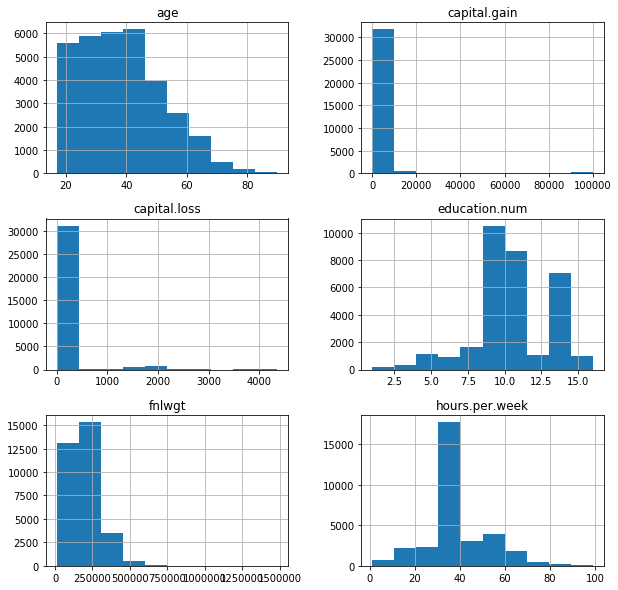

In [142]:
income.hist(figsize=(10,10))

### final data preparation

In [33]:
income_modified.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,other,77053,HS-grad,9,Widowed,other,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,other,186061,Some-college,10,Widowed,other,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K


In [34]:
income_modified['results'] = income_modified.income.apply(lambda x:0 if x =='<=50K' else 1)

In [35]:
income_modified.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income,results
0,90,other,77053,HS-grad,9,Widowed,other,Not-in-family,White,Female,0,4356,40,United-States,<=50K,0
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K,0
2,66,other,186061,Some-college,10,Widowed,other,Unmarried,Black,Female,0,4356,40,United-States,<=50K,0
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K,0
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K,0


In [36]:
for item in income.columns:
    if '?' in set(income[item]):
        print(item)

workclass
occupation
native.country


In [38]:
income_modified.drop(['results','fnlwgt'],axis =1)

,age,workclass,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,other,HS-grad,9,Widowed,other,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,other,Some-college,10,Widowed,other,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,22,Private,Some-college,10,Never-married,Protective-serv,Not-in-family,White,Male,0,0,40,United-States,<=50K
32557,27,Private,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32558,40,Private,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32559,58,Private,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K


In [215]:
for c in income_modified.dtypes[income_modified.dtypes==object].index:
    print(set(income_modified[c]))#.value_counts())

{'Self-emp-not-inc', 'Without-pay', 'Never-worked', 'Private', 'State-gov', 'Local-gov', 'Self-emp-inc', 'other', 'Federal-gov'}
{'Doctorate', 'Some-college', '1st-4th', '12th', '10th', 'Prof-school', '5th-6th', 'Assoc-voc', '9th', '11th', 'Bachelors', 'Assoc-acdm', 'Preschool', 'HS-grad', '7th-8th', 'Masters'}
{'Separated', 'Never-married', 'Divorced', 'Married-AF-spouse', 'Widowed', 'Married-spouse-absent', 'Married-civ-spouse'}
{'Machine-op-inspct', 'Tech-support', 'Other-service', 'Armed-Forces', 'Sales', 'Priv-house-serv', 'Farming-fishing', 'Prof-specialty', 'Craft-repair', 'Adm-clerical', 'Never-worked', 'Exec-managerial', 'Protective-serv', 'Handlers-cleaners', 'Transport-moving', 'other'}
{'Husband', 'Wife', 'Other-relative', 'Unmarried', 'Not-in-family', 'Own-child'}
{'White', 'Black', 'Asian-Pac-Islander', 'Amer-Indian-Eskimo', 'Other'}
{'Female', 'Male'}
{'Mexico', 'Germany', 'India', 'United-States', 'Philippines', 'Canada', 'El-Salvador', 'Puerto-Rico', 'other'}
{'<=50K',

In [217]:
income_modified.dtypes[income_modified.dtypes==object].index

Index(['workclass', 'education', 'marital.status', 'occupation',
       'relationship', 'race', 'sex', 'native.country', 'income'],
      dtype='object')

In [218]:
income_modified.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education.num',
       'marital.status', 'occupation', 'relationship', 'race', 'sex',
       'capital.gain', 'capital.loss', 'hours.per.week', 'native.country',
       'income', 'result'],
      dtype='object')

In [39]:
X_income = income_modified.drop(['results','income','fnlwgt','education'],axis = 1)

In [41]:
X_income.head()

,age,workclass,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country
0,90,other,9,Widowed,other,Not-in-family,White,Female,0,4356,40,United-States
1,82,Private,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States
2,66,other,10,Widowed,other,Unmarried,Black,Female,0,4356,40,United-States
3,54,Private,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States
4,41,Private,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States


In [42]:
income.shape

(32561, 15)

In [43]:
X_income.shape

(32561, 12)

In [44]:
y_income = income_modified.results

In [45]:
income_modified.results.value_counts()

0    24720
1     7841
Name: results, dtype: int64

In [47]:
y_income.value_counts()

0    24720
1     7841
Name: results, dtype: int64

In [69]:
X = pd.get_dummies(X_income)

In [70]:
y = y_income

In [3]:
data.feature_names

['alcohol',
 'malic_acid',
 'ash',
 'alcalinity_of_ash',
 'magnesium',
 'total_phenols',
 'flavanoids',
 'nonflavanoid_phenols',
 'proanthocyanins',
 'color_intensity',
 'hue',
 'od280/od315_of_diluted_wines',
 'proline']

In [2]:
X = data.data
y = data.target

In [271]:
X.shape

(100, 20)

In [3]:
type(X)

numpy.ndarray

In [111]:
import numpy as np
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.33, random_state=42)

In [112]:
X_train.shape

(21815, 59)

In [52]:
X_train.shape

(21815, 59)

#### adult income

In [259]:
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier

clf = DecisionTreeClassifier(random_state=0)
cross_val_score(clf, X_train,y_train, cv=10)


array([0.82722273, 0.82218148, 0.80064161, 0.8304308 , 0.81989001,
       0.81843191, 0.81613939, 0.81889042, 0.82026593, 0.81522238])

In [53]:
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier

clf = DecisionTreeClassifier(random_state=0)
cross_val_score(clf, X_train,y_train, cv=10)


array([0.82722273, 0.82218148, 0.80064161, 0.8304308 , 0.81989001,
       0.81843191, 0.81613939, 0.81889042, 0.82026593, 0.81522238])

In [77]:
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier

clf = DecisionTreeClassifier(random_state=0)
cross_val_score(clf, X_train,y_train, cv=10)


array([0.82676444, 0.82126489, 0.8020165 , 0.82905591, 0.81989001,
       0.81843191, 0.81659789, 0.81889042, 0.82026593, 0.81522238])

In [80]:
clf.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=0, splitter='best')

In [86]:
X.shape

(32561, 59)

In [82]:
clf.feature_importances_.shape

(59,)

In [93]:
ranked_importance = pd.DataFrame(clf.feature_importances_,index=X.columns).sort_values(by=0,ascending=False)
ranked_importance.head(10).index

Index(['marital.status_Married-civ-spouse', 'age', 'education.num',
       'capital.gain', 'hours.per.week', 'capital.loss', 'workclass_Private',
       'workclass_Self-emp-not-inc', 'occupation_Exec-managerial',
       'occupation_Prof-specialty'],
      dtype='object')

In [103]:
important_income = X.loc[:,list(ranked_importance.head(10).index)]

In [106]:
import numpy as np
from sklearn.model_selection import train_test_split

X_important, X_test, y_important, y_test = train_test_split(
    important_income, y, test_size=0.33, random_state=42)

In [107]:
X_important.shape

(21815, 10)

In [109]:
type

array([[0.30136986, 0.73333333, 0.        , 0.        , 0.39795918,
        0.        , 0.        , 0.        , 1.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 1.        , 0.        ,
        0.        , 0.        , 0.        , 1.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        1.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 1.        , 0.        , 1.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 1.        , 0.        ],
       [0.36986301, 0.53333333, 0.        , 0.        , 0.39795918,
        0.        , 0.        , 0.        , 1.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0. 

#### wine

In [8]:
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier

clf = DecisionTreeClassifier(random_state=0)
cross_val_score(clf, X_train,y_train, cv=10)


array([0.92307692, 0.92307692, 0.92307692, 0.83333333, 0.91666667,
       0.91666667, 0.91666667, 1.        , 0.90909091, 1.        ])

### neural network

In [25]:
from sklearn.neural_network import MLPClassifier

clf = MLPClassifier(solver='lbfgs', alpha=1e-5,
                    hidden_layer_sizes=(5, 3), random_state=1)

cross_val_score(clf, X_train,y_train, cv=10)


array([0.38461538, 0.38461538, 0.38461538, 0.41666667, 0.41666667,
       0.41666667, 0.41666667, 0.36363636, 0.36363636, 0.4       ])

In [56]:
from sklearn.neural_network import MLPClassifier

clf = MLPClassifier(solver='lbfgs', alpha=1e-5,
                    hidden_layer_sizes=(5, 3), random_state=1)

cross_val_score(clf, X_train,y_train, cv=10)


array([0.44500458, 0.43446379, 0.4527956 , 0.39871677, 0.42254812,
       0.43420449, 0.43282898, 0.40990371, 0.434663  , 0.45437873])

In [260]:
from sklearn.neural_network import MLPClassifier

clf = MLPClassifier(solver='lbfgs', alpha=1e-5,
                    hidden_layer_sizes=(5, 3), random_state=1)

cross_val_score(clf, X_train,y_train, cv=10)


array([0.44500458, 0.43446379, 0.4527956 , 0.39871677, 0.42254812,
       0.43420449, 0.43282898, 0.40990371, 0.434663  , 0.45437873])

In [261]:
from sklearn.preprocessing import StandardScaler  # doctest: +SKIP
scaler = StandardScaler()  # doctest: +SKIP
# Don't cheat - fit only on training data
scaler.fit(X_train)  # doctest: +SKIP
X_train = scaler.transform(X_train)  # doctest: +SKIP
# apply same transformation to test data
X_test = scaler.transform(X_test)  # doctest: +SKIP

In [23]:
from sklearn.neural_network import MLPClassifier

clf = MLPClassifier(solver='lbfgs', alpha=1e-5,
                    hidden_layer_sizes=(5, 3), random_state=1)

cross_val_score(clf, X_train,y_train, cv=10)


array([0.92307692, 1.        , 1.        , 1.        , 1.        ,
       0.91666667, 1.        , 1.        , 1.        , 1.        ])

In [262]:
from sklearn.neural_network import MLPClassifier

clf = MLPClassifier(solver='lbfgs', alpha=1e-5,
                    hidden_layer_sizes=(5, 3), random_state=1)

cross_val_score(clf, X_train,y_train, cv=10)


array([0.84555454, 0.85792851, 0.8395967 , 0.87121907, 0.85380385,
       0.85281981, 0.84456671, 0.84731774, 0.85511233, 0.85648785])

## GBM

In [26]:
from sklearn.datasets import make_classification
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split
#X, y = make_classification(random_state=0)

clf = GradientBoostingClassifier(random_state=0)
clf.fit(X_train, y_train)

# clf.predict(X_test[:2])

# clf.score(X_test, y_test)
cross_val_score(clf, X_train,y_train, cv=10)


array([1.        , 1.        , 0.92307692, 0.75      , 0.91666667,
       0.91666667, 0.91666667, 1.        , 1.        , 1.        ])

## standarized

In [263]:
from sklearn.datasets import make_classification
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split
X, y = make_classification(random_state=0)

clf = GradientBoostingClassifier(random_state=0)
clf.fit(X_train, y_train)

# clf.predict(X_test[:2])

# clf.score(X_test, y_test)
cross_val_score(clf, X_train,y_train, cv=10)


array([0.86480293, 0.87121907, 0.84967919, 0.87121907, 0.87121907,
       0.86198991, 0.86703347, 0.85923888, 0.8784961 , 0.86244842])

## non standarized

In [54]:
#from sklearn.datasets import make_classification
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split
#X, y = make_classification(random_state=0)

clf = GradientBoostingClassifier(random_state=0)
clf.fit(X_train, y_train)

# clf.predict(X_test[:2])

# clf.score(X_test, y_test)
cross_val_score(clf, X_train,y_train, cv=10)


array([0.86480293, 0.87121907, 0.84967919, 0.87121907, 0.87121907,
       0.86198991, 0.86703347, 0.85923888, 0.8784961 , 0.86244842])

In [289]:
X_train.shape

(21815, 60)

In [294]:
X.shape

(100, 20)

In [292]:
X_train.head()

,age,education.num,capital.gain,capital.loss,hours.per.week,results,workclass_Federal-gov,workclass_Local-gov,workclass_Never-worked,workclass_Private,...,sex_Male,native.country_Canada,native.country_El-Salvador,native.country_Germany,native.country_India,native.country_Mexico,native.country_Philippines,native.country_Puerto-Rico,native.country_United-States,native.country_other
27585,39,12,0,0,40,0,0,0,0,1,...,1,0,0,0,0,0,0,0,1,0
18010,44,9,0,0,40,1,0,0,0,1,...,0,0,0,0,0,0,0,0,1,0
22472,52,9,0,0,50,0,0,0,0,1,...,0,0,0,0,0,0,0,0,1,0
4585,33,10,0,0,40,0,0,0,0,1,...,0,0,0,0,0,0,0,0,1,0
11191,45,10,0,0,40,0,0,0,0,1,...,0,0,0,0,0,0,0,0,1,0


## svm

#### without normalization

In [10]:
from sklearn import svm

clf = svm.SVC(gamma='scale')
clf.fit(X_train, y_train)

cross_val_score(clf, X_train,y_train, cv=10)


array([0.61538462, 0.61538462, 0.69230769, 0.66666667, 0.83333333,
       0.75      , 0.75      , 0.72727273, 0.63636364, 0.6       ])

In [293]:
from sklearn import svm

clf = svm.SVC(gamma='scale')
clf.fit(X_train, y_train)

cross_val_score(clf, X_train,y_train, cv=10)


array([0.80384968, 0.80568286, 0.79560037, 0.81255729, 0.80247479,
       0.80330124, 0.79275562, 0.80192572, 0.80055021, 0.80788629])

In [66]:
from sklearn import svm

clf = svm.SVC(gamma='scale')
clf.fit(X_train, y_train)

cross_val_score(clf, X_train,y_train, cv=10)


array([0.84417965, 0.85013749, 0.84142988, 0.85426214, 0.85426214,
       0.85602934, 0.84456671, 0.84915177, 0.85052728, 0.8519028 ])

In [11]:
from sklearn import svm

clf = svm.SVC(gamma='auto')
clf.fit(X_train, y_train)

cross_val_score(clf, X_train,y_train, cv=10)


array([0.38461538, 0.38461538, 0.38461538, 0.5       , 0.5       ,
       0.41666667, 0.5       , 0.45454545, 0.36363636, 0.4       ])

In [55]:
from sklearn import svm

clf = svm.SVC(gamma='auto')
clf.fit(X_train, y_train)

cross_val_score(clf, X_train,y_train, cv=10)


array([0.85976169, 0.86296975, 0.85105408, 0.86159487, 0.85380385,
       0.85465383, 0.86244842, 0.86428244, 0.86749198, 0.86336543])

#### after standarization

In [12]:
from sklearn.preprocessing import StandardScaler  # doctest: +SKIP
scaler = StandardScaler()  # doctest: +SKIP
# Don't cheat - fit only on training data
scaler.fit(X_train)  # doctest: +SKIP
X_train = scaler.transform(X_train)  # doctest: +SKIP
# apply same transformation to test data
X_test = scaler.transform(X_test)  # doctest: +SKIP

In [14]:
from sklearn import svm

clf = svm.SVC(gamma='scale')
clf.fit(X_train, y_train)

cross_val_score(clf, X_train,y_train, cv=10)


array([1.        , 1.        , 0.92307692, 0.91666667, 1.        ,
       0.91666667, 0.91666667, 1.        , 1.        , 0.9       ])

In [15]:
from sklearn import svm

clf = svm.SVC(gamma='auto')
clf.fit(X_train, y_train)

cross_val_score(clf, X_train,y_train, cv=10)


array([1.        , 1.        , 0.92307692, 0.91666667, 1.        ,
       0.91666667, 0.91666667, 1.        , 1.        , 0.9       ])

In [16]:
clf = svm.SVC(decision_function_shape='ovo',gamma='auto')
clf.fit(X_train, y_train)
cross_val_score(clf, X_train,y_train, cv=10)


array([1.        , 1.        , 0.92307692, 0.91666667, 1.        ,
       0.91666667, 0.91666667, 1.        , 1.        , 0.9       ])

#### linear separator

In [17]:
lin_clf = svm.LinearSVC()
lin_clf.fit(X_train, y_train)
cross_val_score(lin_clf, X_train,y_train, cv=10)


array([1.        , 0.92307692, 1.        , 0.91666667, 1.        ,
       0.91666667, 1.        , 1.        , 1.        , 1.        ])

### linear svm, no standarization

In [58]:
lin_clf = svm.LinearSVC()
lin_clf.fit(X_train, y_train)
cross_val_score(lin_clf, X_train,y_train, cv=10)


C:\Users\zhy89\Anaconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\zhy89\Anaconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\zhy89\Anaconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\zhy89\Anaconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\zhy89\Anaconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", 

array([0.75939505, 0.8116407 , 0.78735105, 0.77956004, 0.73143905,
       0.68592389, 0.76845484, 0.82026593, 0.62219166, 0.83172856])

## knn

In [18]:
from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier(n_neighbors=3)
neigh.fit(X, y)
cross_val_score(neigh, X_train,y_train, cv=10)


array([0.84615385, 0.92307692, 1.        , 0.83333333, 1.        ,
       0.91666667, 0.91666667, 1.        , 0.90909091, 0.9       ])

In [59]:
from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier(n_neighbors=3)
neigh.fit(X_train, y_train)
cross_val_score(neigh, X_train,y_train, cv=10)


array([0.83134739, 0.83684693, 0.83547204, 0.84051329, 0.84463795,
       0.83768913, 0.83402109, 0.83768913, 0.85098579, 0.83631362])

In [108]:
X_important[:2]

,marital.status_Married-civ-spouse,age,education.num,capital.gain,hours.per.week,capital.loss,workclass_Private,workclass_Self-emp-not-inc,occupation_Exec-managerial,occupation_Prof-specialty
27585,0,39,12,0,40,0,1,0,0,0
18010,1,44,9,0,40,0,1,0,0,0


In [115]:
from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier(n_neighbors=3)
#neigh.fit(X_importantm, y_important)
cross_val_score(neigh, X_important,y_important, cv=10)


array([0.82722273, 0.84234647, 0.82355637, 0.82722273, 0.84372136,
       0.83814764, 0.83631362, 0.83539661, 0.83952315, 0.83631362])

In [117]:
X_important.shape

(21815, 10)

In [118]:
from sklearn.preprocessing import StandardScaler,MinMaxScaler  # doctest: +SKIP
scaler = StandardScaler()  # doctest: +SKIP
#scaler = MinMaxScaler()
# Don't cheat - fit only on training data
scaler.fit(X_important)  # doctest: +SKIP
X_important = scaler.transform(X_important)  # doctest: +SKIP
# apply same transformation to test data
#X_test = scaler.transform(X_test)  # doctest: +SKIP

In [119]:
type(X_important)

numpy.ndarray

In [120]:
from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier(n_neighbors=3)
#neigh.fit(X_importantm, y_important)
cross_val_score(neigh, X_important,y_important, cv=10)


array([0.82859762, 0.82493126, 0.81622365, 0.82768103, 0.83226398,
       0.82989454, 0.82118294, 0.83035305, 0.82897753, 0.8349381 ])

## standarization

In [73]:
from sklearn.preprocessing import StandardScaler,MinMaxScaler  # doctest: +SKIP
scaler = StandardScaler()  # doctest: +SKIP
scaler = MinMaxScaler()
# Don't cheat - fit only on training data
scaler.fit(X_train)  # doctest: +SKIP
X_train = scaler.transform(X_train)  # doctest: +SKIP
# apply same transformation to test data
X_test = scaler.transform(X_test)  # doctest: +SKIP

### knn

In [61]:
from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier(n_neighbors=3)
neigh.fit(X_train, y_train)
cross_val_score(neigh, X_train,y_train, cv=10)


array([0.81714024, 0.82218148, 0.8203483 , 0.82355637, 0.83272227,
       0.82118294, 0.82255846, 0.8349381 , 0.81476387, 0.82301696])

In [62]:
lin_clf = svm.LinearSVC()
lin_clf.fit(X_train, y_train)
cross_val_score(lin_clf, X_train,y_train, cv=10)


C:\Users\zhy89\Anaconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\zhy89\Anaconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\zhy89\Anaconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\zhy89\Anaconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\zhy89\Anaconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", 

array([0.84692942, 0.8583868 , 0.84051329, 0.86480293, 0.85747021,
       0.85373682, 0.84548372, 0.84731774, 0.86153141, 0.84961027])

In [63]:
from sklearn import svm

clf = svm.SVC(gamma='auto')
clf.fit(X_train, y_train)

cross_val_score(clf, X_train,y_train, cv=10)


array([0.84417965, 0.85013749, 0.84142988, 0.85380385, 0.85472044,
       0.85648785, 0.84456671, 0.84915177, 0.85098579, 0.8519028 ])

In [64]:
from sklearn import svm

clf = svm.SVC(gamma='scale')
clf.fit(X_train, y_train)

cross_val_score(clf, X_train,y_train, cv=10)


array([0.84417965, 0.85013749, 0.84142988, 0.85426214, 0.85426214,
       0.85602934, 0.84456671, 0.84915177, 0.85052728, 0.8519028 ])

In [65]:
from sklearn.neural_network import MLPClassifier

clf = MLPClassifier(solver='lbfgs', alpha=1e-5,
                    hidden_layer_sizes=(5, 3), random_state=1)

cross_val_score(clf, X_train,y_train, cv=10)


array([0.84555454, 0.85792851, 0.8395967 , 0.87121907, 0.85380385,
       0.85281981, 0.84456671, 0.84731774, 0.85511233, 0.85648785])

In [121]:
X_train[:10]

,age,education.num,capital.gain,capital.loss,hours.per.week,workclass_Federal-gov,workclass_Local-gov,workclass_Never-worked,workclass_Private,workclass_Self-emp-inc,...,sex_Male,native.country_Canada,native.country_El-Salvador,native.country_Germany,native.country_India,native.country_Mexico,native.country_Philippines,native.country_Puerto-Rico,native.country_United-States,native.country_other
27585,39,12,0,0,40,0,0,0,1,0,...,1,0,0,0,0,0,0,0,1,0
18010,44,9,0,0,40,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
22472,52,9,0,0,50,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
4585,33,10,0,0,40,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
11191,45,10,0,0,40,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
23245,21,10,0,0,55,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
25872,20,9,0,0,40,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
23672,37,7,0,0,37,0,0,0,0,0,...,1,0,0,0,0,0,0,0,1,0
16649,52,13,0,0,60,0,0,0,0,1,...,1,0,0,0,0,0,0,0,1,0
24655,32,12,0,0,40,0,0,0,1,0,...,1,0,0,0,0,0,0,0,0,1


### learning curve

In [128]:
print('The scikit-learn version is {}.'.format(sklearn.__version__))


The scikit-learn version is 0.21.3.


In [129]:
?learning_curve

In [127]:
import sklearn

In [141]:
from sklearn.model_selection import learning_curve

from sklearn.model_selection import ShuffleSplit


cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)

estimator = KNeighborsClassifier(n_neighbors=3)
train_sizes, train_scores, test_scores= \
        learning_curve(estimator, X_train, y_train, 
                       cv=cv, 
                       #return_times=True
                      )




In [142]:
from matplotlib import pyplot as plt

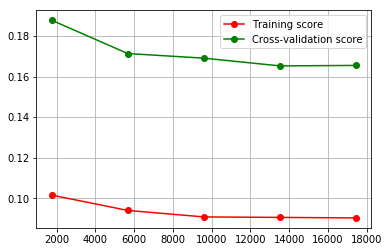

In [143]:
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)


# Plot learning curve
plt.grid()
# plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
#                      train_scores_mean + train_scores_std, alpha=0.1,
#                      color="r")
# plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
#                      test_scores_mean + test_scores_std, alpha=0.1,
#                      color="g")
plt.plot(train_sizes, 1-train_scores_mean, 'o-', color="r",
             label="Training score")
plt.plot(train_sizes, 1-test_scores_mean, 'o-', color="g",
             label="Cross-validation score")
plt.legend(loc="best")


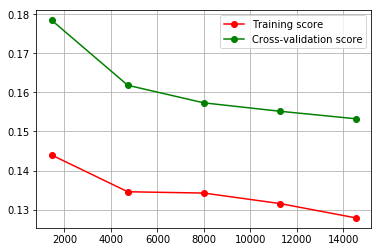

In [140]:
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)


# Plot learning curve
plt.grid()
# plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
#                      train_scores_mean + train_scores_std, alpha=0.1,
#                      color="r")
# plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
#                      test_scores_mean + test_scores_std, alpha=0.1,
#                      color="g")
plt.plot(train_sizes, 1-train_scores_mean, 'o-', color="r",
             label="Training score")
plt.plot(train_sizes, 1-test_scores_mean, 'o-', color="g",
             label="Cross-validation score")
plt.legend(loc="best")


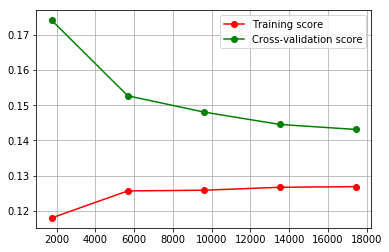

In [144]:
from sklearn.model_selection import learning_curve

from sklearn.model_selection import ShuffleSplit


cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)

#estimator = KNeighborsClassifier(n_neighbors=10)
estimator = svm.SVC(gamma='auto')
train_sizes, train_scores, test_scores= \
        learning_curve(estimator, X_train, y_train, 
                       cv=cv, 
                       #return_times=True
                      )

train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)


# Plot learning curve
plt.grid()
# plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
#                      train_scores_mean + train_scores_std, alpha=0.1,
#                      color="r")
# plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
#                      test_scores_mean + test_scores_std, alpha=0.1,
#                      color="g")
plt.plot(train_sizes, 1-train_scores_mean, 'o-', color="r",
             label="Training score")
plt.plot(train_sizes, 1-test_scores_mean, 'o-', color="g",
             label="Cross-validation score")
plt.legend(loc="best")




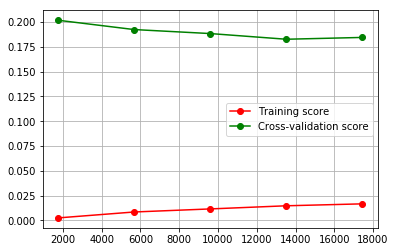

In [145]:
from sklearn.model_selection import learning_curve

from sklearn.model_selection import ShuffleSplit


cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)

#estimator = KNeighborsClassifier(n_neighbors=10)
estimator = DecisionTreeClassifier(random_state=0)

train_sizes, train_scores, test_scores= \
        learning_curve(estimator, X_train, y_train, 
                       cv=cv, 
                       #return_times=True
                      )

train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)


# Plot learning curve
plt.grid()
# plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
#                      train_scores_mean + train_scores_std, alpha=0.1,
#                      color="r")
# plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
#                      test_scores_mean + test_scores_std, alpha=0.1,
#                      color="g")
plt.plot(train_sizes, 1-train_scores_mean, 'o-', color="r",
             label="Training score")
plt.plot(train_sizes, 1-test_scores_mean, 'o-', color="g",
             label="Cross-validation score")
plt.legend(loc="best")




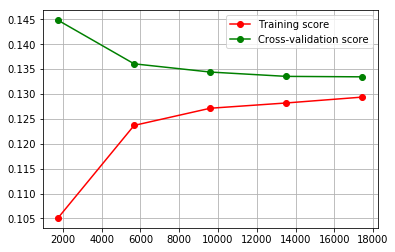

In [146]:
from sklearn.model_selection import learning_curve

from sklearn.model_selection import ShuffleSplit


cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)

#estimator = KNeighborsClassifier(n_neighbors=10)
estimator = GradientBoostingClassifier(random_state=0)

train_sizes, train_scores, test_scores= \
        learning_curve(estimator, X_train, y_train, 
                       cv=cv, 
                       #return_times=True
                      )

train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)


# Plot learning curve
plt.grid()
# plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
#                      train_scores_mean + train_scores_std, alpha=0.1,
#                      color="r")
# plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
#                      test_scores_mean + test_scores_std, alpha=0.1,
#                      color="g")
plt.plot(train_sizes, 1-train_scores_mean, 'o-', color="r",
             label="Training score")
plt.plot(train_sizes, 1-test_scores_mean, 'o-', color="g",
             label="Cross-validation score")
plt.legend(loc="best")




In [147]:
X_train.head()

,age,education.num,capital.gain,capital.loss,hours.per.week,workclass_Federal-gov,workclass_Local-gov,workclass_Never-worked,workclass_Private,workclass_Self-emp-inc,...,sex_Male,native.country_Canada,native.country_El-Salvador,native.country_Germany,native.country_India,native.country_Mexico,native.country_Philippines,native.country_Puerto-Rico,native.country_United-States,native.country_other
27585,39,12,0,0,40,0,0,0,1,0,...,1,0,0,0,0,0,0,0,1,0
18010,44,9,0,0,40,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
22472,52,9,0,0,50,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
4585,33,10,0,0,40,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
11191,45,10,0,0,40,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0


In [148]:
from sklearn.preprocessing import StandardScaler,MinMaxScaler  # doctest: +SKIP
scaler = StandardScaler()  # doctest: +SKIP
scaler = MinMaxScaler()
# Don't cheat - fit only on training data
scaler.fit(X_train)  # doctest: +SKIP
X_train_norm = scaler.transform(X_train)  # doctest: +SKIP
# apply same transformation to test data
X_test_norm = scaler.transform(X_test)  # doctest: +SKIP

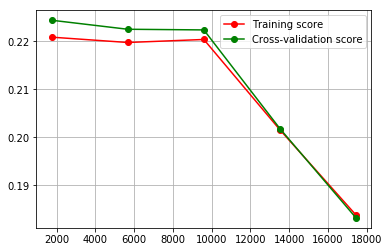

In [155]:
from sklearn.model_selection import learning_curve

from sklearn.model_selection import ShuffleSplit


cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)

#estimator = KNeighborsClassifier(n_neighbors=10)
estimator = MLPClassifier(solver='lbfgs', alpha=15,
                    hidden_layer_sizes=(5, 3), random_state=1)

train_sizes, train_scores, test_scores= \
        learning_curve(estimator, X_train_norm, y_train, 
                       cv=cv, 
                       #return_times=True
                      )

train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)


# Plot learning curve
plt.grid()
# plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
#                      train_scores_mean + train_scores_std, alpha=0.1,
#                      color="r")
# plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
#                      test_scores_mean + test_scores_std, alpha=0.1,
#                      color="g")
plt.plot(train_sizes, 1-train_scores_mean, 'o-', color="r",
             label="Training score")
plt.plot(train_sizes, 1-test_scores_mean, 'o-', color="g",
             label="Cross-validation score")
plt.legend(loc="best")




### grid search cv

In [156]:
estimator.get_params()

{'activation': 'relu',
 'alpha': 15,
 'batch_size': 'auto',
 'beta_1': 0.9,
 'beta_2': 0.999,
 'early_stopping': False,
 'epsilon': 1e-08,
 'hidden_layer_sizes': (5, 3),
 'learning_rate': 'constant',
 'learning_rate_init': 0.001,
 'max_iter': 200,
 'momentum': 0.9,
 'n_iter_no_change': 10,
 'nesterovs_momentum': True,
 'power_t': 0.5,
 'random_state': 1,
 'shuffle': True,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'validation_fraction': 0.1,
 'verbose': False,
 'warm_start': False}

In [157]:
svm.SVC(gamma='auto').get_params()

{'C': 1.0,
 'cache_size': 200,
 'class_weight': None,
 'coef0': 0.0,
 'decision_function_shape': 'ovr',
 'degree': 3,
 'gamma': 'auto',
 'kernel': 'rbf',
 'max_iter': -1,
 'probability': False,
 'random_state': None,
 'shrinking': True,
 'tol': 0.001,
 'verbose': False}

In [158]:
KNeighborsClassifier(n_neighbors=3).get_params()

{'algorithm': 'auto',
 'leaf_size': 30,
 'metric': 'minkowski',
 'metric_params': None,
 'n_jobs': None,
 'n_neighbors': 3,
 'p': 2,
 'weights': 'uniform'}

In [ ]:
param_grid = [
  {'C': [1, 10, 100, 1000], 'kernel': ['linear']},
  {'C': [1, 10, 100, 1000], 'gamma': [0.001, 0.0001], 'kernel': ['rbf']},
 ]

In [160]:
knn = KNeighborsClassifier()

In [161]:
param_grid = [
  {'n_neighbors': [5, 50, 500, 5000], 'weights': ['uniform','distance']}
]

In [165]:
from sklearn.model_selection import GridSearchCV

search = GridSearchCV(knn, param_grid, cv=5)
search.fit(X_train,y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='warn', n_jobs=None,
             param_grid=[{'n_neighbors': [5, 50, 500, 5000],
                          'weights': ['uniform', 'distance']}],
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [164]:
X_train.head()

,age,education.num,capital.gain,capital.loss,hours.per.week,workclass_Federal-gov,workclass_Local-gov,workclass_Never-worked,workclass_Private,workclass_Self-emp-inc,...,sex_Male,native.country_Canada,native.country_El-Salvador,native.country_Germany,native.country_India,native.country_Mexico,native.country_Philippines,native.country_Puerto-Rico,native.country_United-States,native.country_other
27585,39,12,0,0,40,0,0,0,1,0,...,1,0,0,0,0,0,0,0,1,0
18010,44,9,0,0,40,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
22472,52,9,0,0,50,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
4585,33,10,0,0,40,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
11191,45,10,0,0,40,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0


In [166]:
search.best_params_

{'n_neighbors': 50, 'weights': 'distance'}

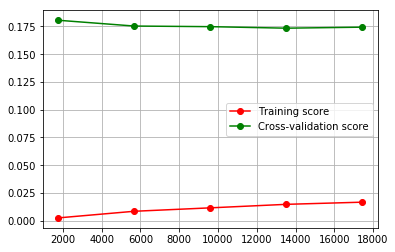

In [167]:
from sklearn.model_selection import learning_curve

from sklearn.model_selection import ShuffleSplit


cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)

estimator = KNeighborsClassifier(n_neighbors=50,weights='distance')


train_sizes, train_scores, test_scores= \
        learning_curve(estimator, X_train_norm, y_train, 
                       cv=cv, 
                       #return_times=True
                      )

train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)


# Plot learning curve
plt.grid()
# plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
#                      train_scores_mean + train_scores_std, alpha=0.1,
#                      color="r")
# plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
#                      test_scores_mean + test_scores_std, alpha=0.1,
#                      color="g")
plt.plot(train_sizes, 1-train_scores_mean, 'o-', color="r",
             label="Training score")
plt.plot(train_sizes, 1-test_scores_mean, 'o-', color="g",
             label="Cross-validation score")
plt.legend(loc="best")




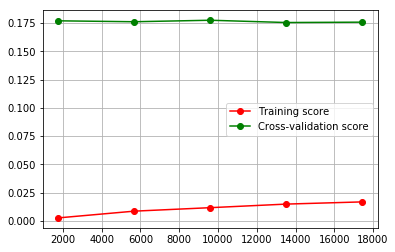

In [168]:
from sklearn.model_selection import learning_curve

from sklearn.model_selection import ShuffleSplit


cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)

estimator = KNeighborsClassifier(n_neighbors=200,weights='distance')


train_sizes, train_scores, test_scores= \
        learning_curve(estimator, X_train_norm, y_train, 
                       cv=cv, 
                       #return_times=True
                      )

train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)


# Plot learning curve
plt.grid()
# plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
#                      train_scores_mean + train_scores_std, alpha=0.1,
#                      color="r")
# plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
#                      test_scores_mean + test_scores_std, alpha=0.1,
#                      color="g")
plt.plot(train_sizes, 1-train_scores_mean, 'o-', color="r",
             label="Training score")
plt.plot(train_sizes, 1-test_scores_mean, 'o-', color="g",
             label="Cross-validation score")
plt.legend(loc="best")




In [ ]:
from sklearn.model_selection import learning_curve

from sklearn.model_selection import ShuffleSplit


cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)

estimator = KNeighborsClassifier(n_neighbors=30,weights='distance')


train_sizes, train_scores, test_scores= \
        learning_curve(estimator, X_train_norm, y_train, 
                       cv=cv, 
                       #return_times=True
                      )

train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)


# Plot learning curve
plt.grid()
# plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
#                      train_scores_mean + train_scores_std, alpha=0.1,
#                      color="r")
# plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
#                      test_scores_mean + test_scores_std, alpha=0.1,
#                      color="g")
plt.plot(train_sizes, 1-train_scores_mean, 'o-', color="r",
             label="Training score")
plt.plot(train_sizes, 1-test_scores_mean, 'o-', color="g",
             label="Cross-validation score")
plt.legend(loc="best")


